In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
from sklearn.model_selection import train_test_split 


In [3]:
df = pd.read_csv("ushape.csv")

In [4]:
df.head(4)

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0


In [5]:
df.shape

(100, 3)

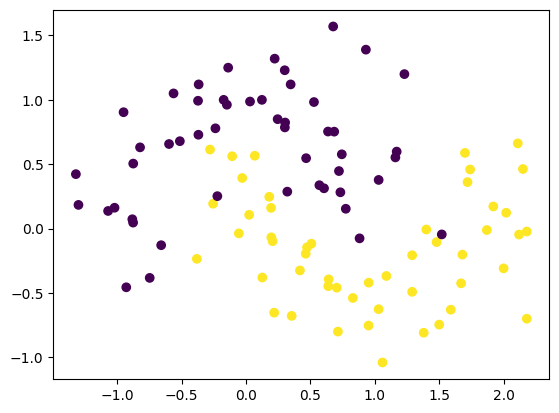

In [6]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [7]:
df.isnull().sum()

X        0
Y        0
class    0
dtype: int64

In [51]:
X = df.iloc[:,:-1]
y= df.iloc[:,2]

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,random_state=42,test_size=0.2)

In [53]:
import tensorflow 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Layer ,Dense 
from tensorflow.keras.layers import Flatten 



In [78]:
model = Sequential()
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47 (188.00 B)

 Trainable params: 47 (188.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
initial_weights = model.get_weights()
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5
model.set_weights(initial_weights)

In [69]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.4844 - loss: 0.7017 - val_accuracy: 0.5000 - val_loss: 0.6881
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5195 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6884
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5039 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6891
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5039 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5195 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6902
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5117 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6905
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4648 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5039 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss

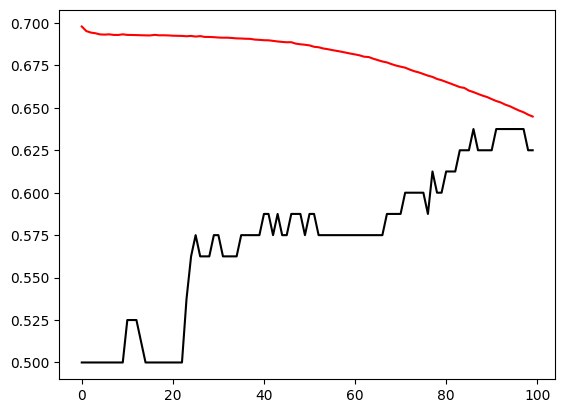

In [72]:
plt.plot(history.history['accuracy'],color='black')
plt.plot(history.history['loss'],color='red')

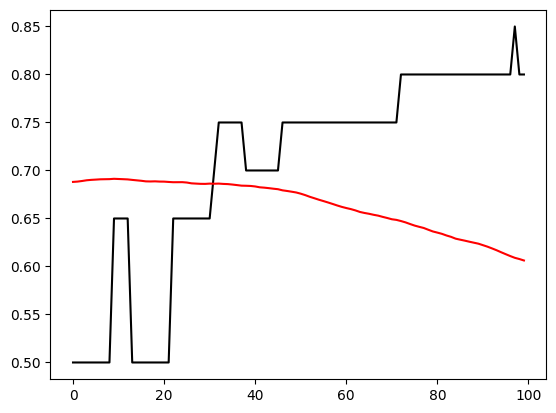

In [73]:
plt.plot(history.history['val_accuracy'],color='black')
plt.plot(history.history['val_loss'],color='red')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step


<Axes: >

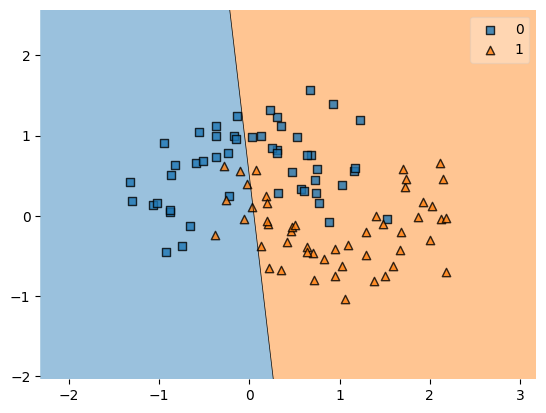

In [77]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,(y.astype(np.int_)).values,clf=model)